<a href="https://colab.research.google.com/github/LakshmiPrasanna9805/Predictive-Analytics/blob/Customer-moment/Customer_moment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🧾 Sample Data:
     x_pos  y_pos time_of_day  time_code  visits
626      1     11     Evening          2      15
265     17     10     Morning          0       6
33       2      3     Morning          0       4
858     17      3     Evening          2      17
568     17     13   Afternoon          1      11


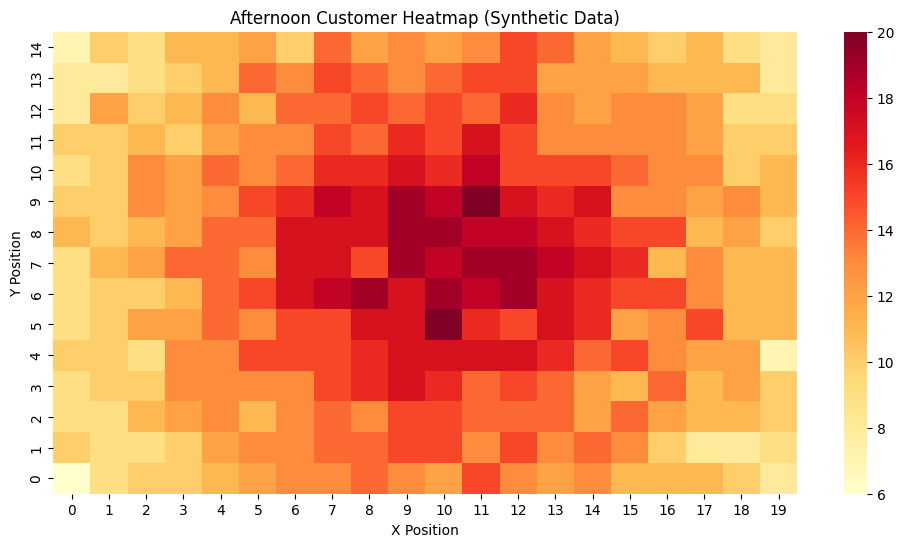


✅ Model Accuracy (R² Score):
Linear Regression: 0.76
Decision Tree:     0.93
Random Forest:     0.96

📍 Predicted visits at (10,7) in Afternoon: 18


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Set seed
np.random.seed(0)

# Simulate grid points (like zones in store)
x = np.arange(0, 20)
y = np.arange(0, 15)
times = ['Morning', 'Afternoon', 'Evening']

# Create combinations
data = []
for t in times:
    time_code = {'Morning': 0, 'Afternoon': 1, 'Evening': 2}[t]
    for i in x:
        for j in y:
            # Simulate visits: highest near (10, 7), decrease with distance
            distance = np.sqrt((i - 10)**2 + (j - 7)**2)
            base_visits = max(20 - distance, 0)

            # Modify based on time
            if t == 'Morning':
                visits = base_visits * 0.5
            elif t == 'Afternoon':
                visits = base_visits * 1.0
            else:  # Evening
                visits = base_visits * 1.5

            # Add small noise
            visits += np.random.normal(0, 1)

            data.append([i, j, t, time_code, max(0, round(visits))])

df = pd.DataFrame(data, columns=['x_pos', 'y_pos', 'time_of_day', 'time_code', 'visits'])
print("\n🧾 Sample Data:")
print(df.sample(5))

# ✅ Heatmap for Afternoon
afternoon_df = df[df['time_of_day'] == 'Afternoon']
pivot = afternoon_df.pivot(index='y_pos', columns='x_pos', values='visits').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Afternoon Customer Heatmap (Synthetic Data)")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.gca().invert_yaxis()
plt.show()

# ✅ Train Models
X = df[['x_pos', 'y_pos', 'time_code']]
y = df['visits']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# ✅ Evaluation
print("\n✅ Model Accuracy (R² Score):")
print(f"Linear Regression: {r2_score(y_test, lr_pred):.2f}")
print(f"Decision Tree:     {r2_score(y_test, dt_pred):.2f}")
print(f"Random Forest:     {r2_score(y_test, rf_pred):.2f}")

# ✅ Predict a new location
sample = pd.DataFrame({'x_pos': [10], 'y_pos': [7], 'time_code': [1]})  # Afternoon
predicted = rf.predict(sample)
print(f"\n📍 Predicted visits at (10,7) in Afternoon: {int(predicted[0])}")

